In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
avocado_df = pd.read_csv('data/avocado.csv',index_col='Unnamed: 0')

In [3]:
avocado_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
avocado_df.sort_values('Date', inplace=True)

In [5]:
avocado_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


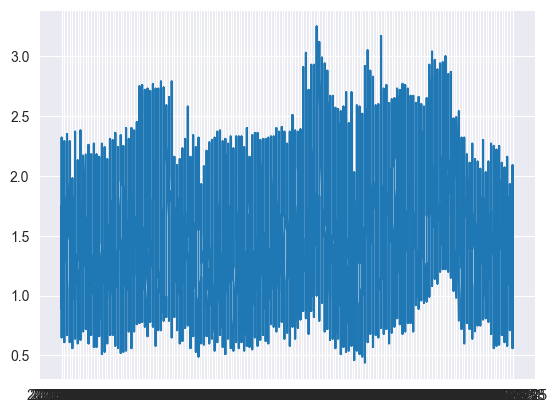

In [6]:
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0,

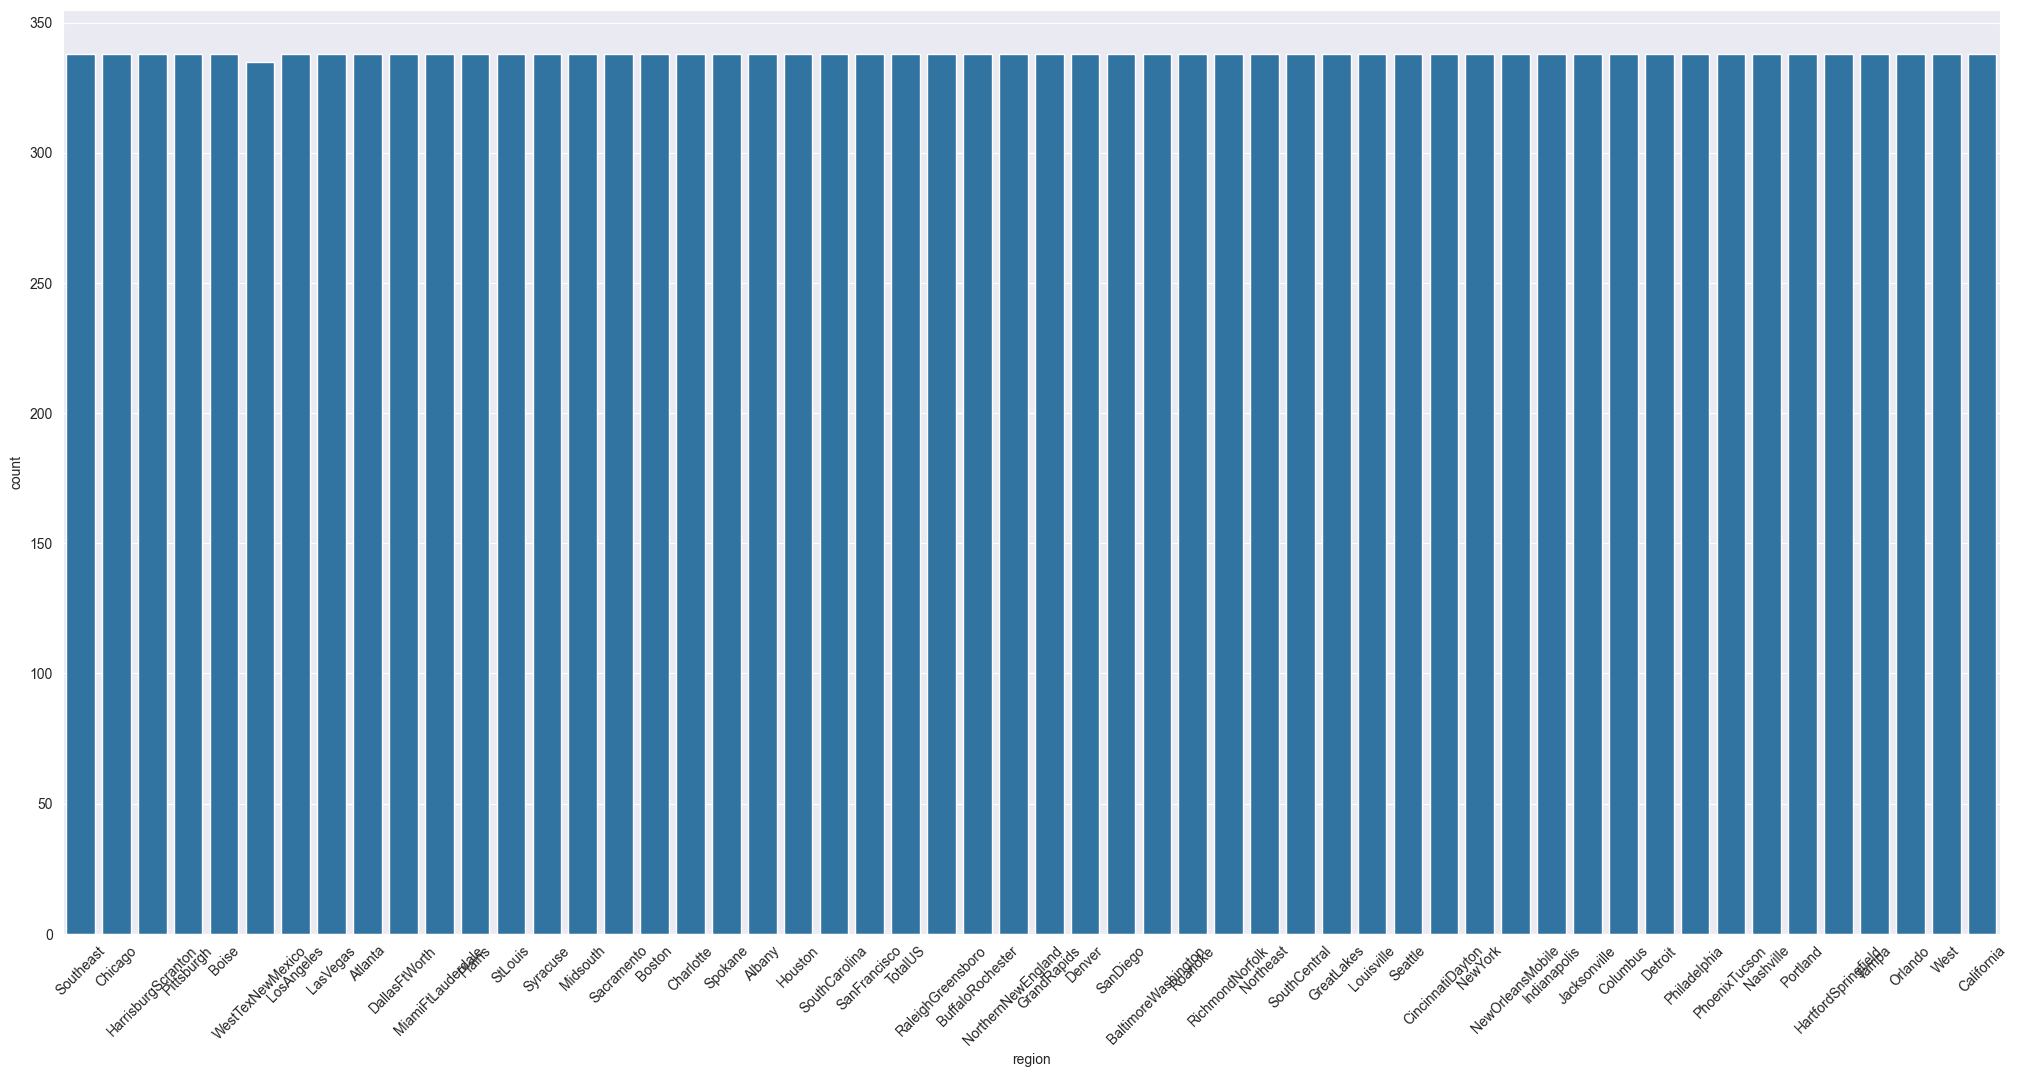

In [7]:
plt.figure(figsize=[25,12])
sns.countplot(x='region',data=avocado_df)
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

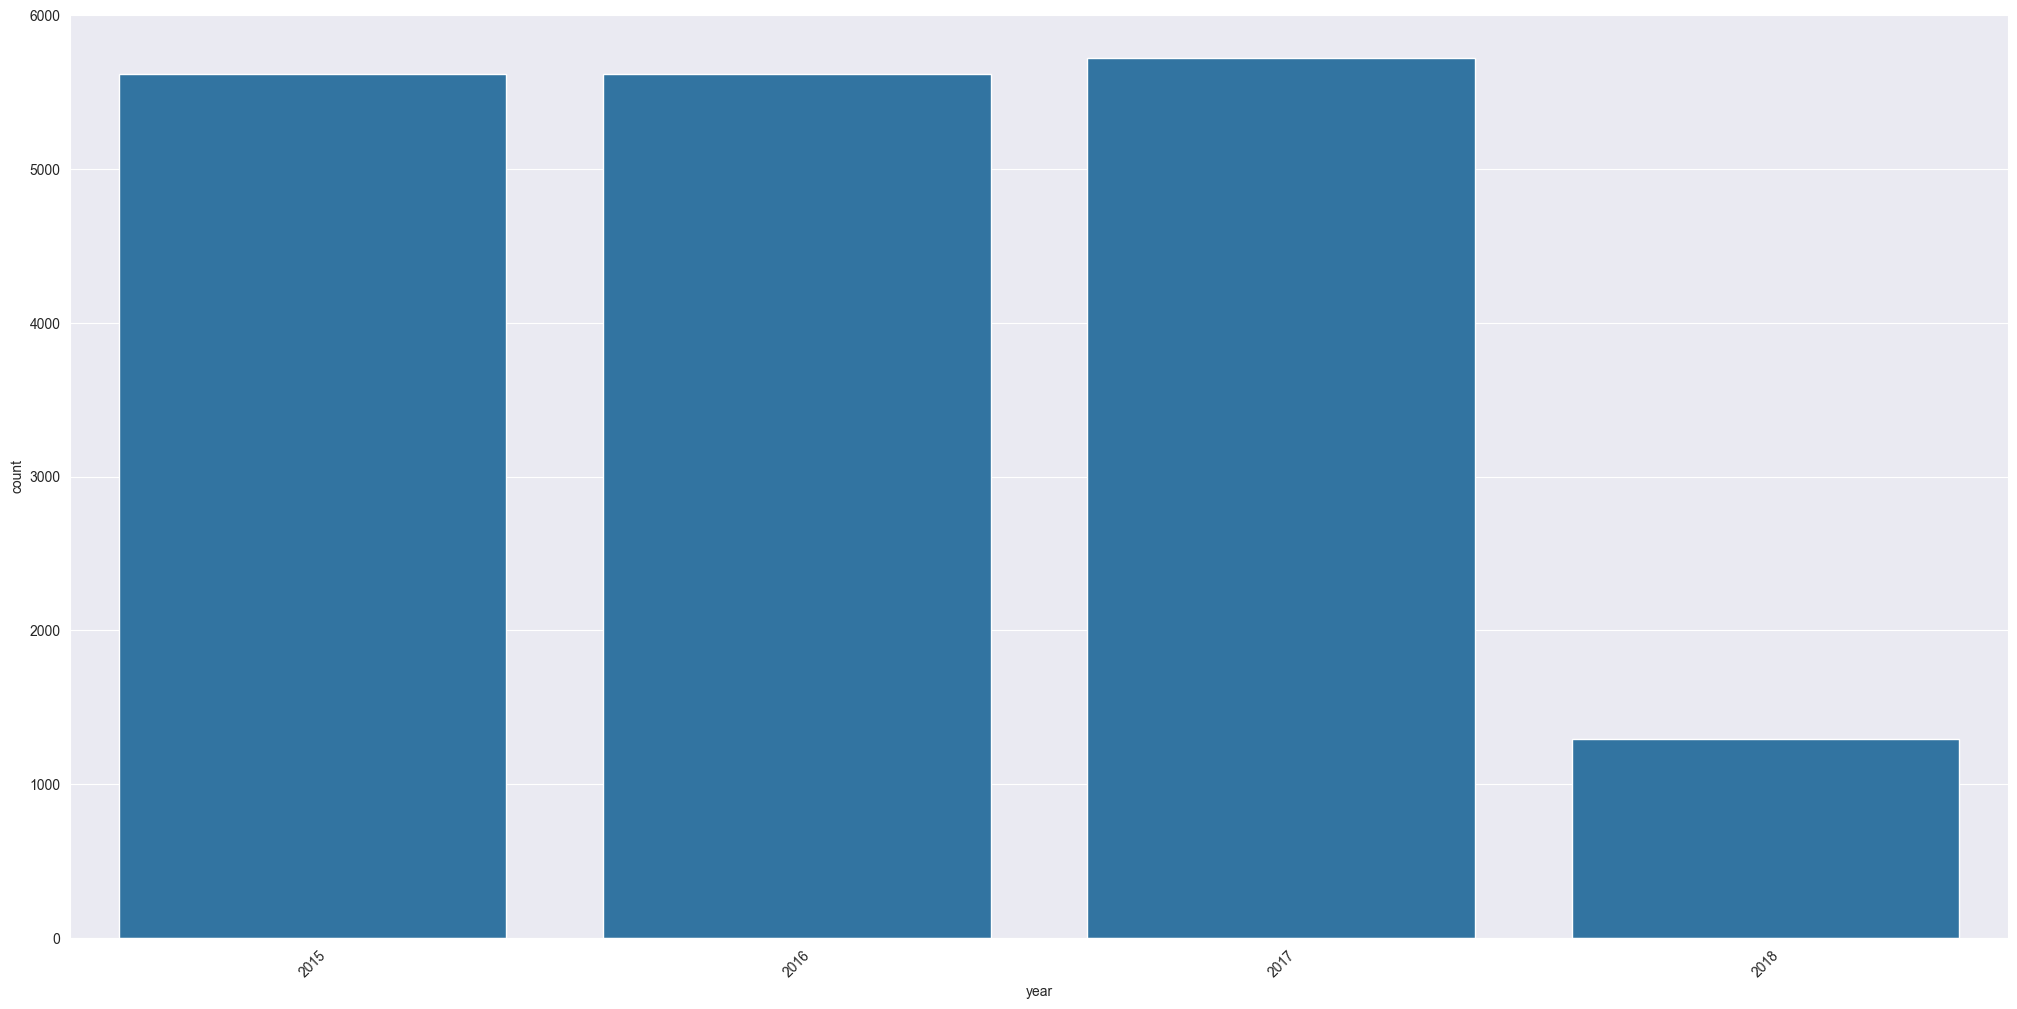

In [8]:
plt.figure(figsize=(25,12))
sns.countplot(x='year',data=avocado_df)
plt.xticks(rotation=45)

In [9]:
avocado_prophet_df=avocado_df[['Date','AveragePrice']]

In [10]:
avocado_prophet_df

,Date,AveragePrice
51,2015-01-04,1.75
51,2015-01-04,1.49
51,2015-01-04,1.68
51,2015-01-04,1.52
51,2015-01-04,1.64
...,...,...
0,2018-03-25,1.36
0,2018-03-25,0.70
0,2018-03-25,1.42
0,2018-03-25,1.70


In [11]:
avocado_prophet_df=avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [12]:
avocado_prophet_df

,ds,y
51,2015-01-04,1.75
51,2015-01-04,1.49
51,2015-01-04,1.68
51,2015-01-04,1.52
51,2015-01-04,1.64
...,...,...
0,2018-03-25,1.36
0,2018-03-25,0.70
0,2018-03-25,1.42
0,2018-03-25,1.70


In [13]:
m=Prophet()
m.fit(avocado_prophet_df)

23:08:39 - cmdstanpy - INFO - Chain [1] start processing
23:08:44 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.500304,0.896282,1.854488,1.500304,1.500304,-0.117910,-0.117910,-0.117910,-0.117910,-0.117910,-0.117910,0.0,0.0,0.0,1.382394
1,2015-01-11,1.494981,0.909319,1.873154,1.494981,1.494981,-0.109398,-0.109398,-0.109398,-0.109398,-0.109398,-0.109398,0.0,0.0,0.0,1.385583
2,2015-01-18,1.489658,0.917489,1.880087,1.489658,1.489658,-0.108945,-0.108945,-0.108945,-0.108945,-0.108945,-0.108945,0.0,0.0,0.0,1.380713
3,2015-01-25,1.484335,0.892507,1.863503,1.484335,1.484335,-0.127679,-0.127679,-0.127679,-0.127679,-0.127679,-0.127679,0.0,0.0,0.0,1.356655
4,2015-02-01,1.479011,0.841469,1.788780,1.479011,1.479011,-0.155659,-0.155659,-0.155659,-0.155659,-0.155659,-0.155659,0.0,0.0,0.0,1.323352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.167023,0.554386,1.571633,0.955964,1.343031,-0.086344,-0.086344,-0.086344,-0.086344,-0.086344,-0.086344,0.0,0.0,0.0,1.080679
530,2019-03-22,1.166297,0.564031,1.577886,0.953781,1.343355,-0.084547,-0.084547,-0.084547,-0.084547,-0.084547,-0.084547,0.0,0.0,0.0,1.081751
531,2019-03-23,1.165571,0.574849,1.628574,0.951896,1.343680,-0.082471,-0.082471,-0.082471,-0.082471,-0.082471,-0.082471,0.0,0.0,0.0,1.083100
532,2019-03-24,1.164845,0.528711,1.622409,0.950542,1.343881,-0.080137,-0.080137,-0.080137,-0.080137,-0.080137,-0.080137,0.0,0.0,0.0,1.084708


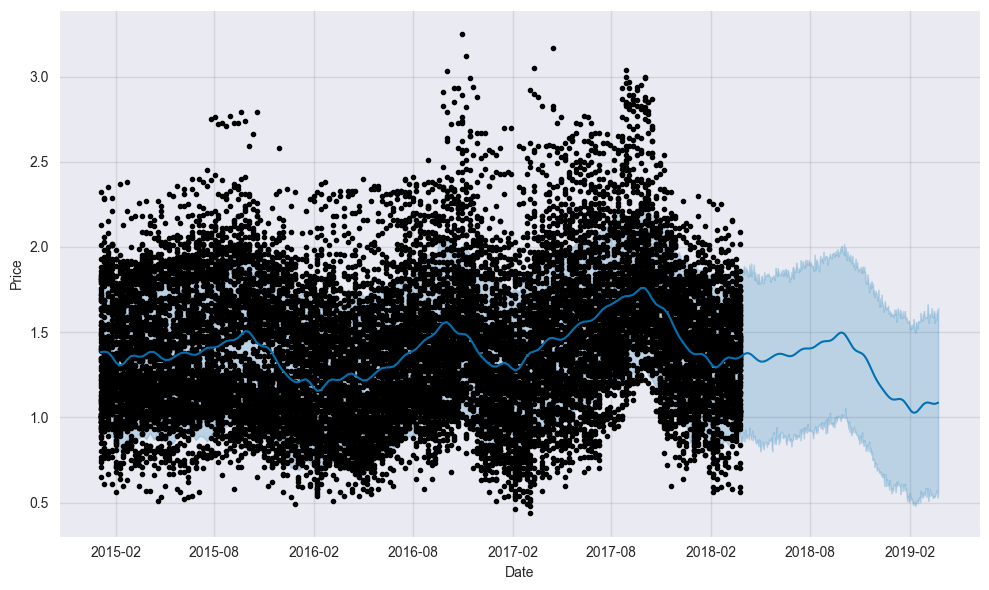

In [16]:
figure = m.plot(forecast,xlabel='Date',ylabel='Price')

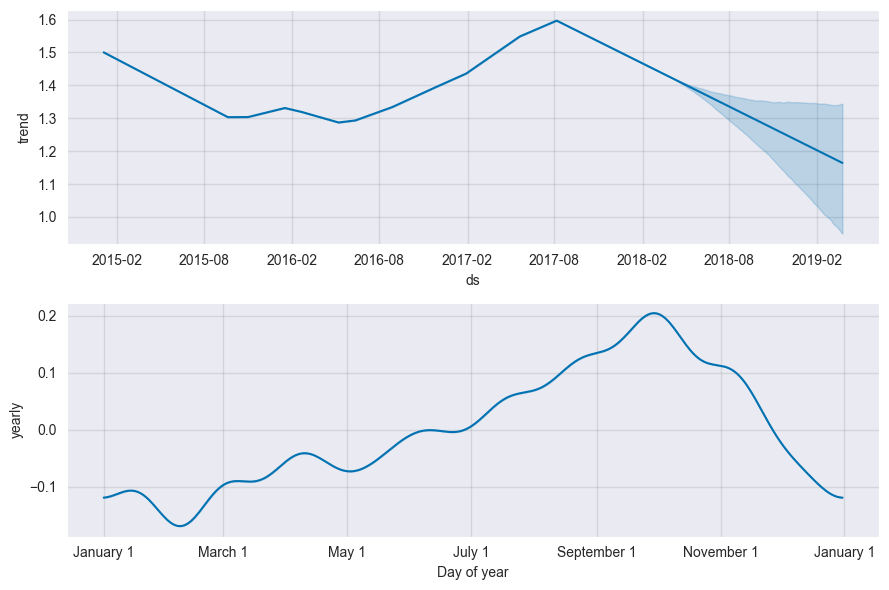

In [17]:
figure3=m.plot_components(forecast)

In [18]:
avocado_df = pd.read_csv('data/avocado.csv')


In [19]:
avocado_df


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [20]:
avocado_df_sample = avocado_df[avocado_df['region']=='West']

In [21]:
avocado_df_sample = avocado_df_sample.sort_values("Date")

In [22]:
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18227,2,2018-03-11,1.63,264691.87,27566.25,60383.57,276.42,176465.63,107174.93,69290.70,0.00,organic,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


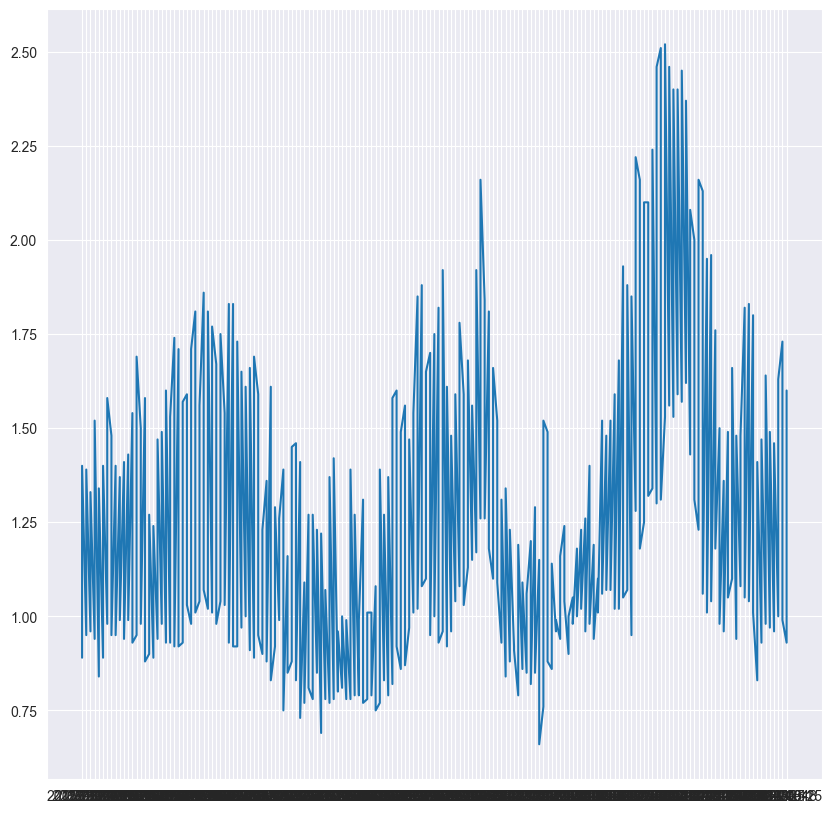

In [23]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [24]:
avocado_df_sample = avocado_df_sample.rename(columns={'Date':'ds', 'AveragePrice':'y'})


In [25]:
m = Prophet()
m.fit(avocado_df_sample)
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

23:12:11 - cmdstanpy - INFO - Chain [1] start processing
23:12:11 - cmdstanpy - INFO - Chain [1] done processing


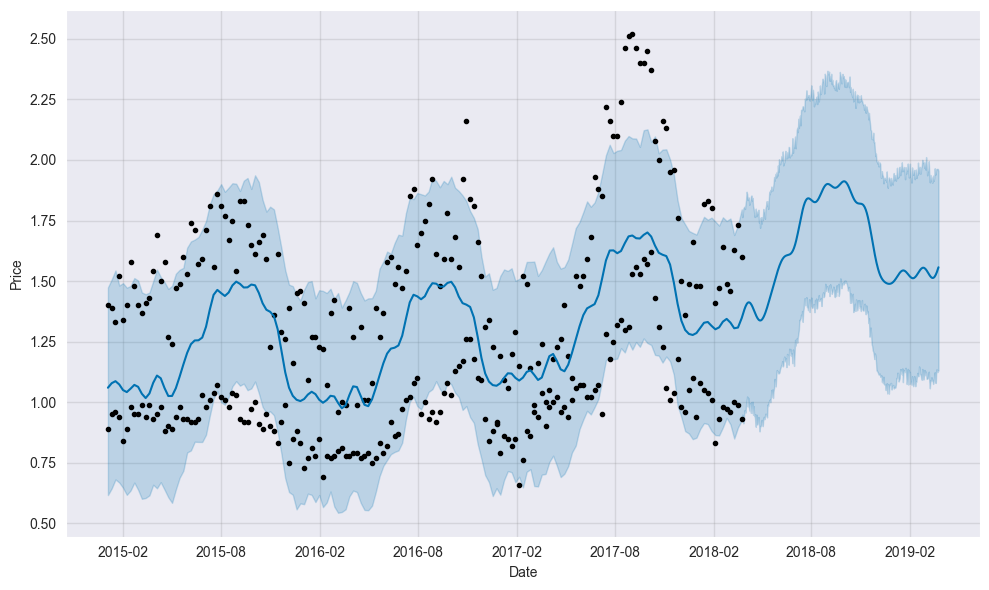

In [26]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

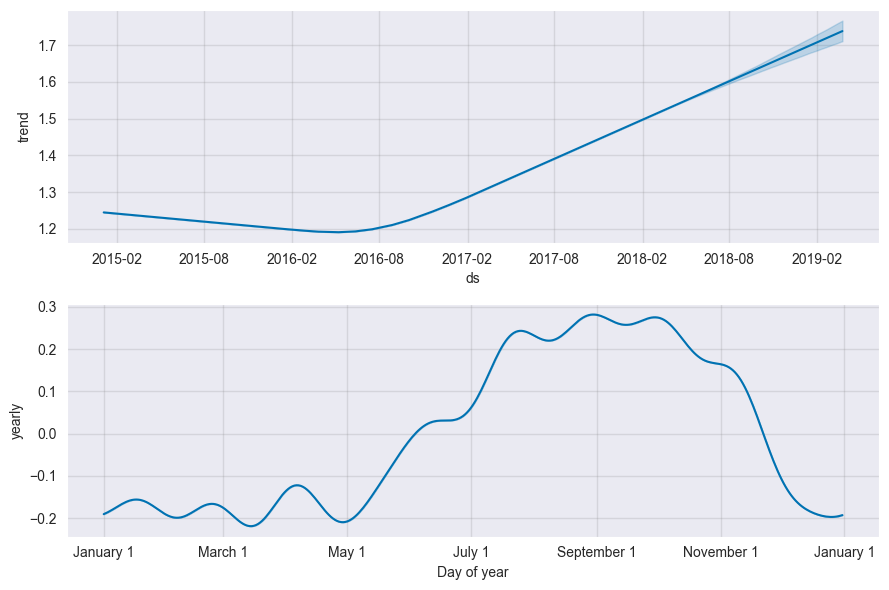

In [27]:
figure3 = m.plot_components(forecast)